In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.manifold import TSNE

In [4]:
df_cosmetics = pd.read_csv('/content/cosmeticos.csv')
df_cosmetics

,Tipo,Marca,Nome,Preco,Rating,Ingredientes,Pele_Mista,Pele_Seca,Pele_Normal,Pele_Oleosa,Pele_Sensivel
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


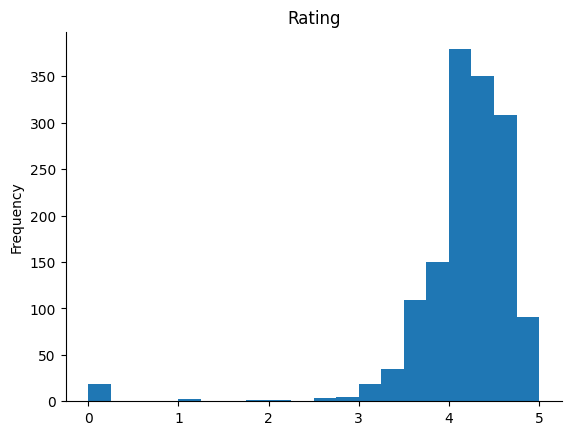

In [7]:
# @title Rating

from matplotlib import pyplot as plt
df_cosmetics['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df_cosmetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           1472 non-null   object 
 1   Marca          1472 non-null   object 
 2   Nome           1472 non-null   object 
 3   Preco          1472 non-null   int64  
 4   Rating         1472 non-null   float64
 5   Ingredientes   1472 non-null   object 
 6   Pele_Mista     1472 non-null   int64  
 7   Pele_Seca      1472 non-null   int64  
 8   Pele_Normal    1472 non-null   int64  
 9   Pele_Oleosa    1472 non-null   int64  
 10  Pele_Sensivel  1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


#t-SNE Algorithm

In [10]:
X = df_cosmetics.copy()
X.drop(columns=['Nome', 'Ingredientes'], axis=1, inplace=True)

In [11]:
numeric_features = ['Rating', 'Preco']
categorical_features = ['Marca', 'Tipo']

In [12]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [16]:
# transformation pre processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [17]:
X_transfomed = preprocessor.fit_transform(X)

In [18]:
X_transfomed

<1472x129 sparse matrix of type '<class 'numpy.float64'>'
	with 10368 stored elements in Compressed Sparse Row format>

In [29]:
# store t-SNE result
results_df = pd.DataFrame()

In [30]:
for perplexity in range(5, 51, 1):

  #build and trian model
  tsne = TSNE(n_components=2, perplexity=perplexity, init='random', n_iter=250, random_state=51)
  tsne_results = tsne.fit_transform(X_transfomed)

  # store results
  temp_df = pd.DataFrame(tsne_results, columns=['component 1', 'component 2'])
  temp_df['perplexity'] = perplexity
  results_df = pd.concat([results_df, temp_df], axis=0)

In [31]:
results_df.head()

,component 1,component 2,perplexity
0,-0.685441,-0.448774,5
1,-0.784273,-0.435739,5
2,0.868181,0.059914,5
3,-0.698899,-0.441222,5
4,1.166562,-0.300477,5


In [32]:
results_df.reset_index(drop=True, inplace=True)

# Result View

In [35]:
# Animated Scatter Plot
fig = px.scatter(results_df, x='component 1', y='component 2', animation_frame='perplexity', title='visualization t-SNE perplexity variation')
fig.show()